# Predicting Whether People Subscribe to Newsletters: PLAICraft Data Analysis

## Background

As part of an experiment lead by Frank Wood at UBC Computer Science, this report will provide a comprehensive analysis and exploration of the players.csv data set, that reports on the players of a minecraft server called PLAICraft. The computer science team that created the server wishes to answer a set of broad questions, which will be narrowed down in this report to only answer one specific question that will aid in the data recruitment and analysis efforts of the UBC team. The Pacific Laboratory for Artificial Intelligence (PLAI) is looking to advance AI technologies while remaining safe and productive for society as a whole. Their advancements in AI include trying to create embodied AI that learns and interacts just like a human does in the real world. They want to be able to use data gathered from the players in the Mincraft server to help train and develop the AI.

### The full data comes in two sets:

**Data Set 1 (sessions.csv):**
Reports on the aspects of each of the sessions of each of the players.

Number of Observations: 1535

Number of Variables: 5

Variables:

hashedEmail - character
- Identifies the user based on their email.
             
start_time - character
- Time and date that the user started playing the server. 
             
end_time - character
- Time and date that the user ended playing the server. 
         
original_start_time - double

- Time and date that the user started playing the server using unix timestamp (running total of seconds)

original_end_time - double
- Time and date that the user ended playing the server using unix timestamp (running total of seconds)

However, this data set will not be used for our analysis as it is not necessary to answer our analysis question. 

**Data Set 2 (players.csv):** 
Reports on multiple characterstics and aspects of each individual that has signed up for the server.


Number of Observations: 196

Number of Variables: 7

Variables:

experience - character
- Shows the expertise of the user. 
         
subscribe - logical
- Indicates if individual has a subscription to the server newsletter or not. 
         
hashedEmail - character
- Identifies the user based on their email.

played_hours - double
- Time in hours that a user has spent on the server. 
             
name - character
- Stated name of the user. 
         
gender - character
- Stated gender of the user.
         
Age - double
- Stated age of the user.



**Mission**

In this report, we are examining how accurately hours played, age, gender, and experience of a player predict whether that player will subscribe to the server newsletter in the players.csv data set. We have determined that an accuracy of 70% is high enough to confirm the model's reliablility in predicting subscription status to the server newsletter. Any findings from this model --- accurate or not --- will provide valuable information on the behavioural habits of players and correlations between player characterstics to aid PLAI in the training and creation of the embodied AI. 


PLAI. (n.d.). *PLAICraft*. https://plaicraft.ai/ 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

#importing data
url<-"https://raw.githubusercontent.com/zchen189/Group-Project/refs/heads/main/data/players%20(1).csv"
players<-read_csv(url)
players

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [2]:
url<-"https://raw.githubusercontent.com/zchen189/Group-Project/refs/heads/main/data/sessions.csv"
sessions<-read_csv(url)
sessions <- sessions |>
                            separate( col = start_time, into = c("start_date", "start_time"), sep = " ") |>
                            separate( col = end_time, into = c("end_date", "end_time"), sep = " ") |>
                            mutate(start_date = as.Date(start_date, format = "%d/%m/%Y")) |>
                      
mutate(end_date = as.Date(end_date, format = "%d/%m/%Y")) #Making data tidy and putting date columns into date variable type
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25,06:15,2024-07-25,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20,02:26,2024-05-20,02:45,1.71617e+12,1.71617e+12


# Exploratory Visualizations

#### We will perform a few exploratory visualizations to get a rough idea of whether a relationship exists between the variables:

In [3]:
url_1 <- "https://raw.githubusercontent.com/maxforman2025/Project-Individual/refs/heads/main/players.csv"

players_data <- read_csv(url_1)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


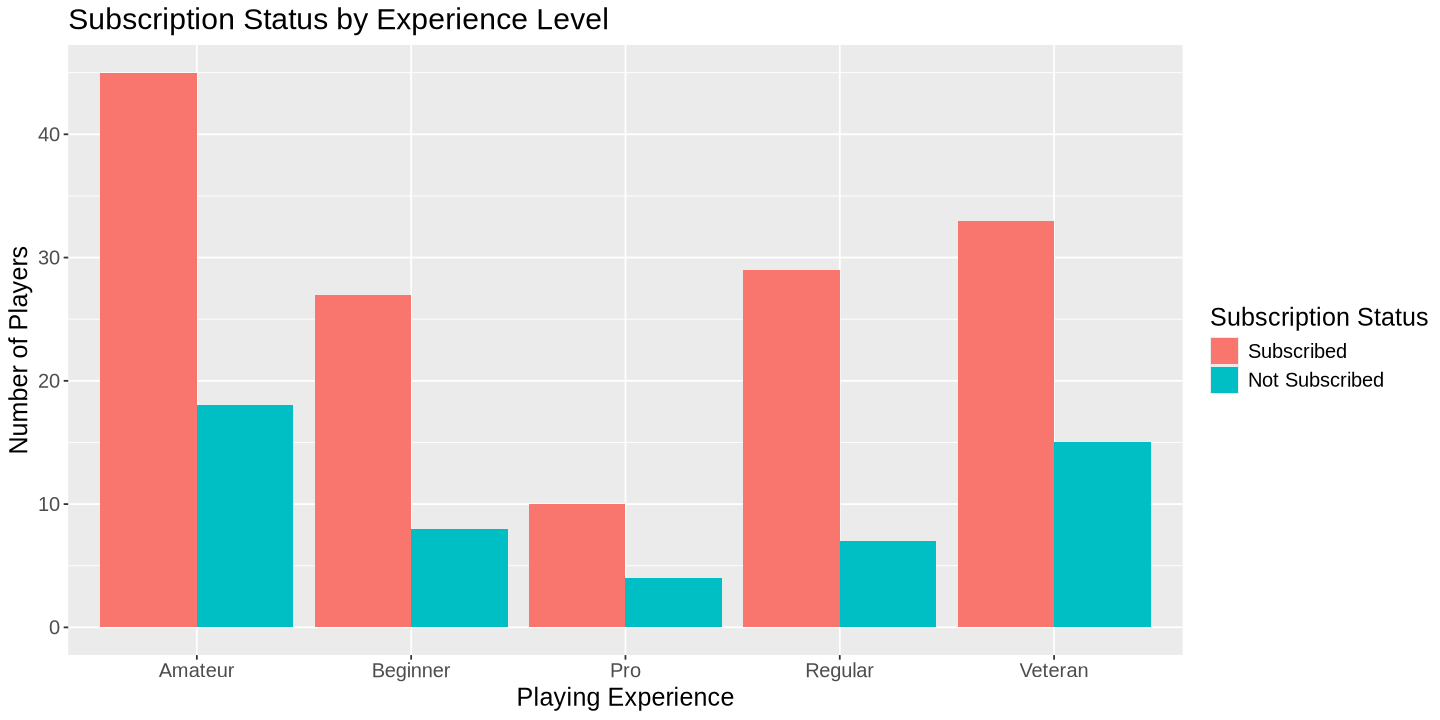

In [4]:
library(ggplot2) #to create nice, colourful plots
options(repr.plot.width = 12, repr.plot.height = 6) 
#Changing values in the "Subscribe" column from "True, False" to "Subscribed, Not Subscribed"
players_data$subscribe <- factor(players_data$subscribe, 
                                 levels = c(TRUE, FALSE), 
                                 labels = c("Subscribed", "Not Subscribed"))
#Creating a Scatter Plot
experience <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(x = "Playing Experience", y = "Number of Players", fill = "Subscription Status", title = "Subscription Status by Experience Level") +
    theme(text = element_text(size = 15))
experience

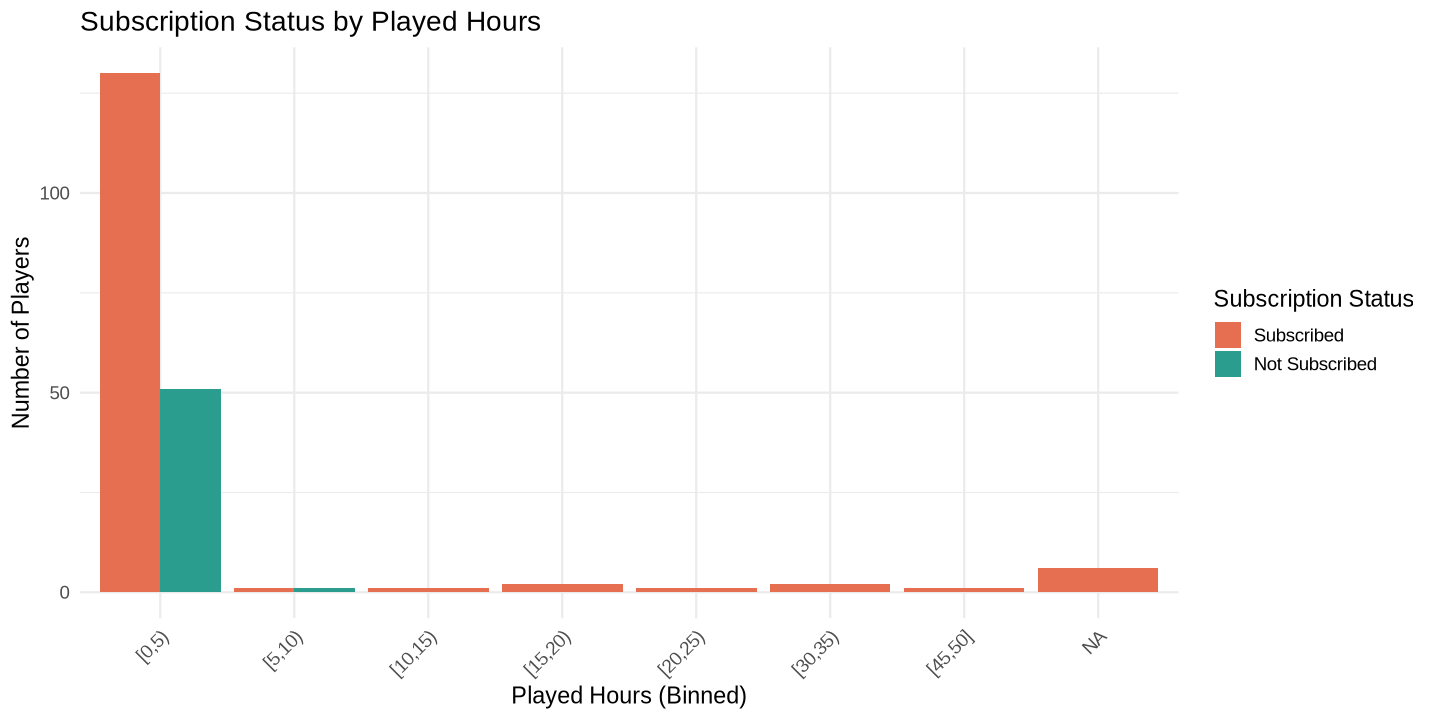

In [5]:
options(repr.plot.width = 12, repr.plot.height = 6) 

library(dplyr)
library(ggplot2)

options(repr.plot.width = 12, repr.plot.height = 6)

# Bin the values into hour ranges
players_data <- players_data %>%
  filter(!is.na(played_hours)) %>%
  mutate(hour_bin = cut(played_hours, breaks = seq(0, 50, by = 5), include.lowest = TRUE, right = FALSE))

# Plot
hours <- ggplot(players_data, aes(x = hour_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = c("Subscribed" = "#E76F51", "Not Subscribed" = "#2A9D8F")) +
  labs(x = "Played Hours (Binned)", y = "Number of Players", fill = "Subscription Status",
       title = "Subscription Status by Played Hours") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

hours


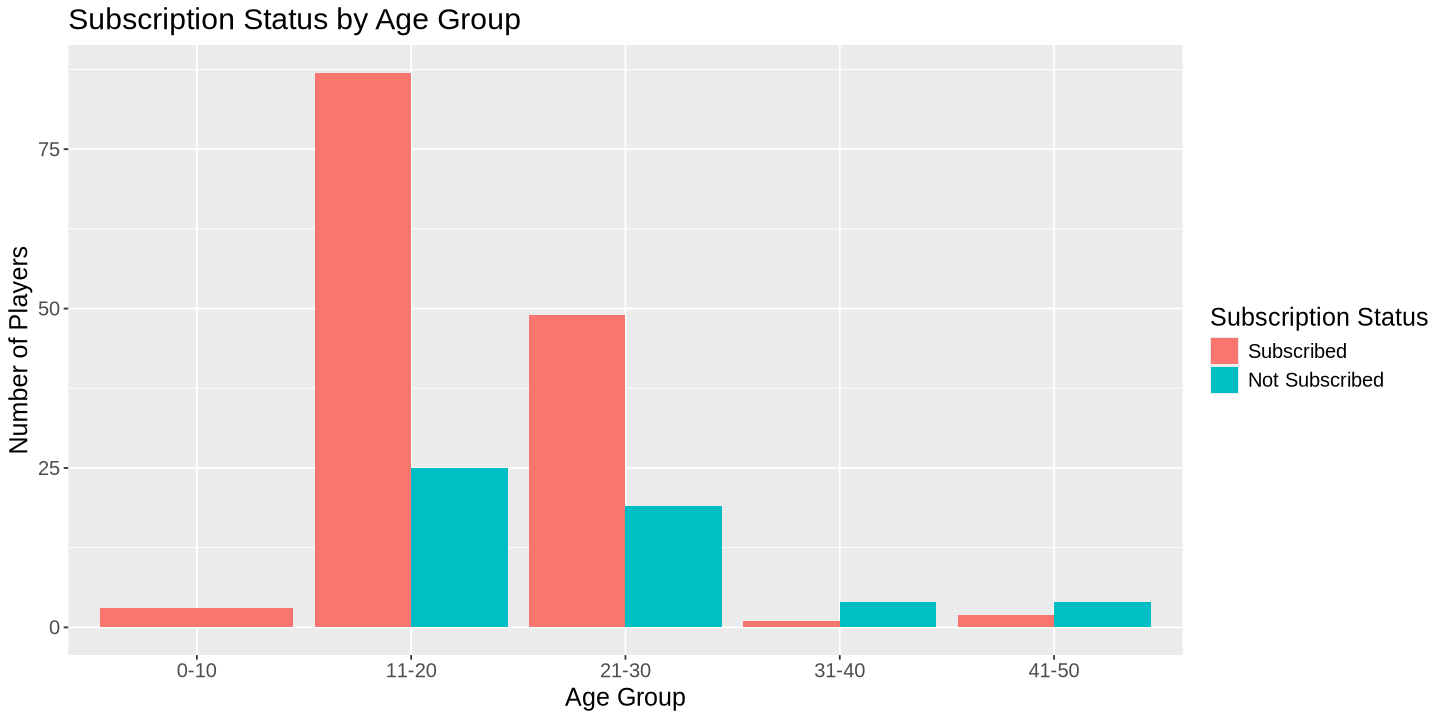

In [6]:
players_data <- players_data %>%
#Changing age values into age groups to make an effecive visualization
mutate(Age_Group = cut(Age, 
                         breaks = c(0, 10, 20, 30, 40, 50, 100), 
                         labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51+"),
                         right = TRUE)) %>%
filter(!is.na (Age_Group))

age <- ggplot(players_data, aes(x = Age_Group, fill = as.factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Status by Age Group",
       x = "Age Group",
       y = "Number of Players",
       fill = "Subscription Status") +
    theme(text = element_text(size = 15))
age

## Classification Model

In [7]:
#explore dataset to see subscribe conditions
players |>
  distinct(subscribe)
#to change subscribe condition to factors
players <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe,"Y" = "TRUE","N" = "FALSE"))
glimpse(players)
#explore to see experience conditions
players|>
distinct(experience)
#recode as dbl
pro_players<-players|>filter(experience=="Pro")
pro_players<-pro_players|>mutate(numerical_experience=5)
veteran_players<-players|>filter(experience=="Veteran")|>mutate(numerical_experience=4)
amateur_players<-players|>filter(experience=="Amateur")|>mutate(numerical_experience=3)
regular_players<-players|>filter(experience=="Regular")|>mutate(numerical_experience=2)
beginner_players<-players|>filter(experience=="Beginner")|>mutate(numerical_experience=1)
pro_veteran<-bind_rows(pro_players, veteran_players)
pro_veteran_amateur<-bind_rows(pro_veteran,amateur_players)
pro_veteran_amateur_regular<-bind_rows(pro_veteran_amateur,regular_players)
pro_veteran_amateur_regular_beginner<-bind_rows(pro_veteran_amateur_regular,beginner_players)
players<-pro_veteran_amateur_regular_beginner
players

subscribe
<lgl>
TRUE
FALSE


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <fct> Y, Y, N, Y, Y, Y, Y, N, Y, Y, Y, Y, Y, Y, Y, N, Y, Y, Y, …
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


experience,subscribe,hashedEmail,played_hours,name,gender,Age,numerical_experience
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,Y,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,5
Pro,Y,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,5
Pro,Y,0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1.0,Knox,Male,17,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Beginner,N,42eafe96ed5c1684e3b5cc614d1b01a117173d3ec6898abcf1177d9822bd39f7,0.3,Ariana,Female,17,1
Beginner,N,80afc8e7137de6a232421e926c1e6e64ddeef1d8157c4439746bc00fcf91e8a7,1.8,Amelia,Male,32,1
Beginner,Y,8c9d043ebb3689e679a37bfed30ea96272bcd14689ed2d9fcd68a4ae0c1663bc,0.0,Lina,Female,17,1


In [8]:
#explore dataset proportion
num_obs <-nrow(players)
players|>
  group_by(subscribe) |>
  summarize(count= n(),
    percentage = n() / num_obs * 100)

subscribe,count,percentage
<fct>,<int>,<dbl>
N,52,26.53061
Y,144,73.46939


Rows: 196
Columns: 8
$ experience           <chr> "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", …
$ subscribe            <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, N, N, N, N, Y, Y, N, Y…
$ hashedEmail          <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0…
$ played_hours         <dbl> 30.3, 0.0, 1.0, 0.2, 1.2, 0.5, 0.1, 0.0, 0.6, 0.4…
$ name                 <chr> "Morgan", "Daniela", "Knox", "Tristan", "Sakura",…
$ gender               <chr> "Male", "Male", "Male", "Male", "Male", "Male", "…
$ Age                  <dbl> 9, 17, 17, 17, 17, 12, 15, 25, 19, 21, 17, 17, 17…
$ numerical_experience <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4…


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


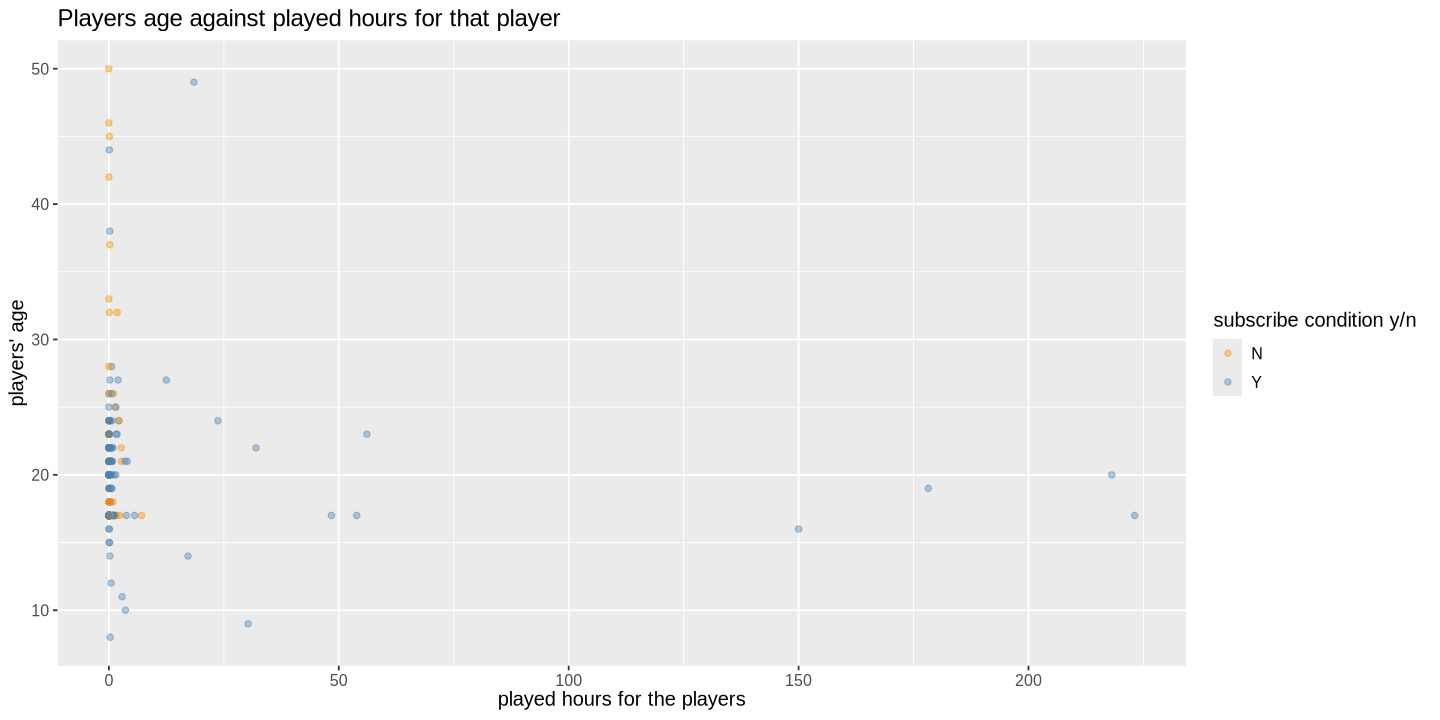

In [9]:
#to extra column we wanted
glimpse(players)
hours_age<-players|>ggplot(aes(x=played_hours,y=Age,color=subscribe))+
geom_point(alpha=0.4)+
labs(x="played hours for the players", y="players' age", color="subscribe condition y/n")+
scale_color_manual(values=c("darkorange","steelblue"))+
theme(text=element_text(size=12)) +
ggtitle("Players age against played hours for that player")
hours_age



As we can see from the above scatter plot that there is no relationship between players age and played hours for the players, and thus, the players' age and played hours for the players are two independent values. We can use these two values to see if they can predict whether a player will subscribe. 
If two values are not independent to each other, there could be a counfounding variable that affect the predictions. In other cases, there is only one variable that affects the predictions.

Also, we can see that the players who subscribe to the newsletter typically fall in the lower area of the plot. By contrast, players with no subscription typically fall in the upper area. There are more players who subscribe to the newsletter in this dataset than players who do not. We can also say that players who subscribe to the newsletter tend to younger in age and play longer played hours.

In [10]:
#to get the extra column we wanted
players_train<-players|>
select(played_hours,Age,numerical_experience,subscribe)|>filter(!is.na(Age))
players_train

played_hours,Age,numerical_experience,subscribe
<dbl>,<dbl>,<dbl>,<fct>
30.3,9,5,Y
0.0,17,5,Y
1.0,17,5,Y
⋮,⋮,⋮,⋮
0.3,17,1,N
1.8,32,1,N
0.0,17,1,Y


In [11]:
#to set seed for reproducibility
set.seed(520)

In [12]:
#create the train/test split
split<-initial_split(players_train,prop=0.75,strata=subscribe)
train_set<-training(split)
test_set<-testing(split)
#review the training/testing set
glimpse(train_set)
glimpse(test_set)
#to see the train_set proportion
num_obs <-nrow(train_set)
train_set_proportion<-train_set|>group_by(subscribe)|>summarize(count=n(),percentage = n() / num_obs * 100)
train_set_proportion
#confirmed that subsets have a similar proportion with the original players dataset

Rows: 145
Columns: 4
$ played_hours         <dbl> 0.4, 0.0, 0.2, 1.7, 0.0, 0.0, 1.4, 0.1, 0.1, 2.7,…
$ Age                  <dbl> 21, 17, 17, 17, 17, 23, 25, 22, 18, 22, 20, 46, 1…
$ numerical_experience <dbl> 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3…
$ subscribe            <fct> N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N…
Rows: 49
Columns: 4
$ played_hours         <dbl> 1.2, 3.8, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0,…
$ Age                  <dbl> 17, 17, 17, 18, 17, 21, 22, 20, 17, 20, 17, 17, 1…
$ numerical_experience <dbl> 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3…
$ subscribe            <fct> Y, Y, Y, N, Y, Y, Y, N, Y, Y, N, Y, Y, N, Y, Y, N…


subscribe,count,percentage
<fct>,<int>,<dbl>
N,39,26.89655
Y,106,73.10345


In [13]:
# recreate the standardization recipe
# (since it must be based on the training data)
players_recipe <- recipe(subscribe~played_hours +Age+numerical_experience,
                        data =train_set) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train_set)

knn_fit#predictions
predictions<-predict(knn_fit,test_set)|>
bind_cols(test_set)

predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3310345
Best kernel: rectangular
Best k: 3

.pred_class,played_hours,Age,numerical_experience,subscribe
<fct>,<dbl>,<dbl>,<dbl>,<fct>
N,1.2,17,5,Y
Y,3.8,17,4,Y
N,0.0,17,4,Y
⋮,⋮,⋮,⋮,⋮
Y,0.0,22,1,Y
Y,0.3,17,1,N
Y,1.8,32,1,N


In [15]:
#predictions
predictions<-predict(knn_fit,test_set)|>
bind_cols(test_set)

predictions

.pred_class,played_hours,Age,numerical_experience,subscribe
<fct>,<dbl>,<dbl>,<dbl>,<fct>
N,1.2,17,5,Y
Y,3.8,17,4,Y
N,0.0,17,4,Y
⋮,⋮,⋮,⋮,⋮
Y,0.0,22,1,Y
Y,0.3,17,1,N
Y,1.8,32,1,N


In [16]:
#accuracy
predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5306122


In [17]:
predictions |> pull(subscribe) |> levels()

[1] "N" "Y"

In [18]:
#set the “positive” class and confusion metrix
predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

confusion <- predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6969697


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6388889


          Truth
Prediction  N  Y
         N  3 13
         Y 10 23

In [19]:
#tuning k
#split into training and validation sets
players_split <- initial_split(train_set, prop = 0.75, strata =subscribe)
players_subtrain <- training(players_split)
players_validation <- testing(players_split)
glimpse(players_split)
glimpse(players_subtrain)

List of 4
 $ data  : tibble [145 × 4] (S3: tbl_df/tbl/data.frame)
  ..$ played_hours        : num [1:145] 0.4 0 0.2 1.7 0 0 1.4 0.1 0.1 2.7 ...
  ..$ Age                 : num [1:145] 21 17 17 17 17 23 25 22 18 22 ...
  ..$ numerical_experience: num [1:145] 5 5 5 5 4 4 4 4 4 4 ...
  ..$ subscribe           : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ in_id : int [1:108] 3 4 5 6 7 8 9 11 13 14 ...
 $ out_id: logi NA
 $ id    : tibble [1 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ id: chr "Resample1"
 - attr(*, "class")= chr [1:3] "initial_split" "mc_split" "rsplit"
Rows: 108
Columns: 4
$ played_hours         <dbl> 0.2, 1.7, 0.0, 0.0, 1.4, 0.1, 0.1, 0.0, 0.1, 0.0,…
$ Age                  <dbl> 17, 17, 17, 23, 25, 22, 18, 20, 19, 17, 22, 22, 1…
$ numerical_experience <dbl> 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3…
$ subscribe            <fct> N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N…


In [20]:
#to redo recipe based on new subset
train_recipe <- recipe(subscribe  ~ played_hours + Age+numerical_experience,
                        data = players_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
train_recipe
#knn model
knn_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_subtrain)
#predictions on validation data to see
validation_predictions<-predict(knn_fit,players_validation)|>
bind_cols(players_validation)
# compute the accuracy
acc <- validation_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



[1] 0.5945946

In [21]:

#To perform 5-fold cross-validation
players_folds <- vfold_cv(train_set, v = 5, strata = subscribe)

# recreate the standardization recipe
# (since it must be based on the training data)
players_recipe <- recipe(subscribe~played_hours +Age+numerical_experience,
                        data =train_set) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
players_recipe

knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results<-workflow()|>
add_recipe(players_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=players_folds,grid=k_vals)|>
collect_metrics()
knn_results


accuracies <- knn_results |> filter(.metric == "accuracy")
accuracies
# finding accuracies



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5103448,5,0.02915782,Preprocessor1_Model01
1,roc_auc,binary,0.4068723,5,0.04191457,Preprocessor1_Model01
2,accuracy,binary,0.5103448,5,0.02915782,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,roc_auc,binary,0.5836000,5,0.036104420,Preprocessor1_Model29
30,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model30
30,roc_auc,binary,0.5960575,5,0.038175563,Preprocessor1_Model30


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5103448,5,0.02915782,Preprocessor1_Model01
2,accuracy,binary,0.5103448,5,0.02915782,Preprocessor1_Model02
3,accuracy,binary,0.5177176,5,0.01429506,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7242529,5,0.009854939,Preprocessor1_Model28
29,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model29
30,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model30


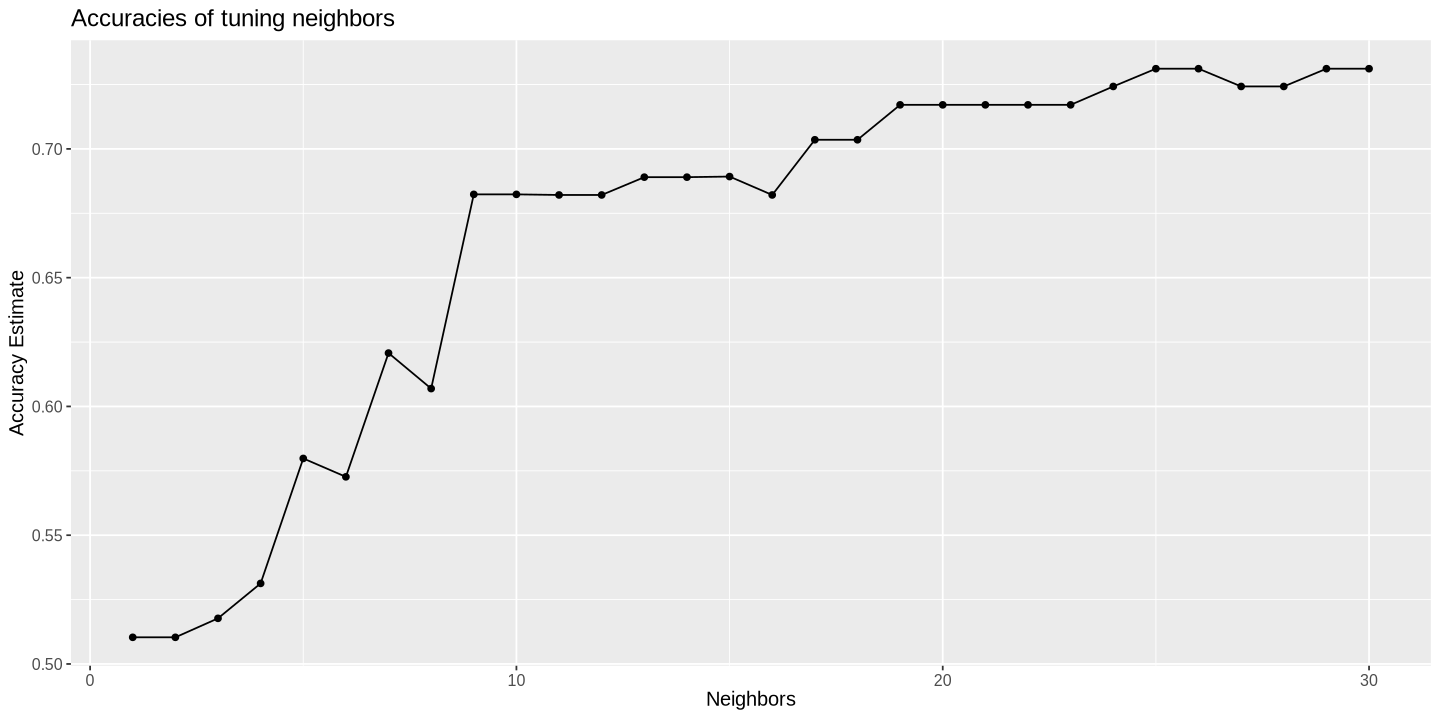

In [26]:
accuracy_vs_k<- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12)) +
    ggtitle("Accuracies of tuning neighbors")

accuracy_vs_k
#plotting accuracy against the number of neighbors to determine which neighbors is the best

In [23]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 25

In [24]:
recipe <- recipe(subscribe ~ played_hours + Age+numerical_experience, data =train_set) |> 
  step_scale(all_predictors()) |>
  step_center(all_predictors())
recipe
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  fit(data = train_set)

knn_fit
# creating recipe and model to fit on the data



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(25,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 25

In [25]:

predictions<-predict(knn_fit,test_set)|>
bind_cols(test_set)
predictions
glimpse(predictions)
head(predictions)
tail(predictions)

predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
# finding accuracy of model

#recall & precision & confusion matrix
predictions|>pull(subscribe)|>levels()
predictions|>precision(truth=subscribe,estimate=.pred_class,event_level="second")
predictions|>recall(truth=subscribe,estimate=.pred_class,event_level="second")
confustion<-predictions|>conf_mat(truth=subscribe,estimate=.pred_class)
confustion


.pred_class,played_hours,Age,numerical_experience,subscribe
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Y,1.2,17,5,Y
Y,3.8,17,4,Y
Y,0.0,17,4,Y
⋮,⋮,⋮,⋮,⋮
Y,0.0,22,1,Y
Y,0.3,17,1,N
Y,1.8,32,1,N


Rows: 49
Columns: 5
$ .pred_class          <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y…
$ played_hours         <dbl> 1.2, 3.8, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0,…
$ Age                  <dbl> 17, 17, 17, 18, 17, 21, 22, 20, 17, 20, 17, 17, 1…
$ numerical_experience <dbl> 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3…
$ subscribe            <fct> Y, Y, Y, N, Y, Y, Y, N, Y, Y, N, Y, Y, N, Y, Y, N…


.pred_class,played_hours,Age,numerical_experience,subscribe
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Y,1.2,17,5,Y
Y,3.8,17,4,Y
Y,0.0,17,4,Y
Y,0.1,18,4,N
Y,0.0,17,4,Y
Y,0.1,21,4,Y


.pred_class,played_hours,Age,numerical_experience,subscribe
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Y,1.0,17,1,Y
Y,0.7,24,1,Y
Y,23.7,24,1,Y
Y,0.0,22,1,Y
Y,0.3,17,1,N
Y,1.8,32,1,N


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


[1] "N" "Y"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7346939


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


          Truth
Prediction  N  Y
         N  0  0
         Y 13 36

# Discussion

Ultimately, our analysis showed that when using a classification model first with 3 neighbours to predict for subscription status using experience, age, and hours played in the players.csv data set, it had an accuracy of ~53%. This is not a very high accuracy and falls below our threshold. This means it would not be beneficial in determining if someone is going to subscribe to the server newsletter based on the predictor values. 

This lack of accuracy prompted us to do further analysis to reveal the best number of neighbours to train the data set on, which ended up being 17 neighbours. When repeating the same classification model using the tuned number of neighbours, the accuracy of the model was ~74%. This is above the threshold of 70% that we set in the introduction. We determined that 70% or higher is a good enough accuracy to use when determining subscription status because of the context of the situation. The consequences of mispredicting an individual as a subscriber are very low, which means that there is more room for error in the model. We still want the model to be accurate the majority of the time, and 70% is a healthy middle ground between accuracy and room for error. Since model would be accurate in it's prediction almost three quarters of the time, it could provide PLAI with valuable information that they could use to help develop the embodied AI that they are trying to create. 

Also we noticed that the accruacy is the same as the proportion of subscribe in the dataset. This is 

Based on our initial exploratory analysis, we did not expect the model's accuracy to be as high as it was. When looking at the graphs, the proportions between subscribed and not subscribed did not lead us to predict that there is a strong relationship between the predictor variables and subscription status. This contradiction of the model to our expectations speaks to the unpredictability and sometimes misleading nature of exploratory graphs, and proves the importance of using real models to analyze data. If we had stopped at using the graphs to answer our analysis question, we would have missed out on important predictory information that could be used to train the embodied AI model. 

As PLAI are trying to model the AI to respond and act like a real player, they now have very valuable information on real player habits, and what types of players are likely to subscribe to the newsletter. They could incorporate this information into the AI, which would allow it to predict the habits of any player it is interacting with, as well as resemble a player better itself. 

After completing this investigation, a question that came up was whether or not this dataset's subscription status statistics were representitive of a general population, or just a population that is interested in going in and playing Minecraft. After all, one can infer that somebody who would want to play Minecraft and have their playing data collected is more likely to subscribe to a Minecraft newsletter than someone who has no interest in Minecraft at all. Maybe, a future investigation could look into what a "general population's" subscription stastics look like and consider if they differ from the population in this dataset. 